In [9]:
from __future__ import division, print_function

In [20]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
from time import sleep
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
import streamlit as st

In [11]:
url = 'https://www.baseball-reference.com/teams/{}/{}'
team_list = ['ATL', 'PHI', 'NYM', 'MIA', 'WSN', 'MIL', 'STL', 'CIN', 'CHC',
            'PIT', 'SFG', 'LAD', 'SDP', 'COL', 'ARI', 'TBR', 'NYY', 'BOS',
            'TOR', 'BAL', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'HOU', 'SEA', 
            'OAK', 'LAA', 'TEX']
url_list = []

year_list = [*range(1998, 2022, 1)]
print(year_list)
year_list = [str(x) for x in year_list]

for t in year_list:
    url = 'https://www.baseball-reference.com/teams//' + t + '.shtml'
    for i in team_list:


        ## MON to WSN
        if i == 'WSN' and int(t) < 2005:
            i = 'MON'
            
        ## TBD to TBR
        if i == 'TBR' and int(t) < 2008:
            i ='TBD'
        
        ## FLA to MIA
        if i == 'MIA' and int(t) < 2012:
            i = 'FLA'
        
        ## ANA to LAA
        if i == 'LAA' and int(t) < 2005:
            i = 'ANA'
            
        
        team_temp = url[:41] + i + url[41:]
        url_list.append(team_temp)

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [12]:
def delete_let(a, b):
    num_let = a.count(b)
    i = 0
    while i < num_let:
        a.remove(b)
        i += 1
    return a



In [13]:
player_list = []

age_f = []
game_played_f = []
pa_f = []
at_bat_f = []
runs_f = []
hits_f = []
doubles_f = []
homeruns_f = []
so_f = []
bb_f = []
ba_f = []
rbi_f = []


for u in url_list:
    soup = bs(requests.get(u).text)

    spex = soup.find('tbody')

    #age
    age_tag = spex.find_all(attrs = {'data-stat' : 'age'})
    age = [t.text for t in age_tag]
    delete_let(age, 'Age')
    age_f.extend(age)
#     print(age)


    #Game played
    game_played_tag = spex.find_all(attrs = {'data-stat' : 'G'})
    game_played = [t.text for t in game_played_tag]
    delete_let(game_played, 'G')
    game_played_f.extend(game_played)
#     print(game_played)

    #Plate Appearances
    pa_tag = spex.find_all(attrs = {'data-stat' : 'PA'})
    pa = [t.text for t in pa_tag]
    delete_let(pa, 'PA')
    pa_f.extend(pa)
#     print(pa)

    #At Bats
    at_bat_tag = spex.find_all(attrs = {'data-stat' : 'AB'})
    at_bat = [t.text for t in at_bat_tag]
    delete_let(at_bat, 'AB')
    at_bat_f.extend(at_bat)
#     print(at_bat)

    #Runs Scored
    runs_tag = spex.find_all(attrs = {'data-stat' : 'R'})
    runs = [t.text for t in runs_tag]
    delete_let(runs, 'R')
    runs_f.extend(runs)
#     # print(runs)

    #Hits
    hits_tag = spex.find_all(attrs = {'data-stat' : 'H'})
    hits = [t.text for t in hits_tag]
    delete_let(hits, 'H')
    hits_f.extend(hits)
#     # print(hits)

    #Doubles Hit
    doubles_tag = spex.find_all(attrs = {'data-stat' : '2B'})
    doubles = [t.text for t in doubles_tag]
    delete_let(doubles, '2B')
    doubles_f.extend(doubles)
#     # print(doubles)

    #Home Runs
    homeruns_tag = spex.find_all(attrs = {'data-stat' : 'HR'})
    homeruns = [t.text for t in homeruns_tag]
    delete_let(homeruns, 'HR')
    homeruns_f.extend(homeruns)
#     # print(homeruns)

    #Runs Batted In
    rbi_tag = spex.find_all(attrs = {'data-stat' : 'RBI'})
    rbi = [t.text for t in rbi_tag]
    delete_let(rbi, 'RBI')
    rbi_f.extend(rbi)
#     print(rbi)

    #Strikeouts
    so_tag = spex.find_all(attrs = {'data-stat' : 'SO'})
    so = [t.text for t in so_tag]
    delete_let(so, 'SO')
    so_f.extend(so)
#     # print(so)

    #Bases on Balls
    bb_tag = spex.find_all(attrs = {'data-stat' : 'BB'})
    bb = [t.text for t in bb_tag]
    delete_let(bb, 'BB')
    bb_f.extend(bb)
#     # print(bb)

    #Batting Averages - target
    batting_avg_tag = spex.find_all(attrs = {'data-stat' : 'batting_avg'})
    batting_avg = [t.text for t in batting_avg_tag]
    delete_let(batting_avg, 'BA')
    ba_f.extend(batting_avg)
#     print(batting_avg)


    


In [14]:
## Cleaning at_bat data to make it standard

for i in range(0, len(at_bat_f)):
    if at_bat_f[i] == '':
        at_bat_f[i] = 'n/a'

# print(at_bat_f)

In [15]:
mlb_df = pd.DataFrame(list(zip(age_f, game_played_f, pa_f, at_bat_f, 
                              runs_f, hits_f, doubles_f, homeruns_f, rbi_f,
                              so_f, bb_f, ba_f)), 
                      columns = ['Age', 'Game_Played', 'PA', 'At_Bat',
                                'Run', 'Hit', 'Double', 'Homerun', 'RBI',
                                'SO', 'BB', 'BA'])

In [16]:
# mlb_df.head()
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33831 entries, 0 to 33830
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          33831 non-null  object
 1   Game_Played  33831 non-null  object
 2   PA           33831 non-null  object
 3   At_Bat       33831 non-null  object
 4   Run          33831 non-null  object
 5   Hit          33831 non-null  object
 6   Double       33831 non-null  object
 7   Homerun      33831 non-null  object
 8   RBI          33831 non-null  object
 9   SO           33831 non-null  object
 10  BB           33831 non-null  object
 11  BA           33831 non-null  object
dtypes: object(12)
memory usage: 3.1+ MB


In [17]:
#data cleaning

mlb_df['At_Bat']
mlb_df = mlb_df.loc[mlb_df['At_Bat'] != 'n/a']

mlb_df['At_Bat'] = mlb_df['At_Bat'].astype(int)

mlb_df = mlb_df.loc[mlb_df['At_Bat'] >= 162]

,Age,Game_Played,PA,At_Bat,Run,Hit,Double,Homerun,RBI,SO,BB,BA
0,27,133,534,489,73,139,21,34,106,85,30,.284
1,37,153,648,555,103,169,27,44,121,146,63,.305
2,33,109,401,366,50,94,21,9,37,37,29,.257
3,34,96,424,347,64,97,18,0,27,53,59,.280
4,26,160,707,601,123,188,29,34,107,93,96,.313


In [18]:
#Changing data typep of each columns

mlb_df['Age'] = mlb_df['Age'].astype(int)
mlb_df['Game_Played'] = mlb_df['Game_Played'].astype(int)
mlb_df['PA'] = mlb_df['PA'].astype(int)
mlb_df['Run'] = mlb_df['Run'].astype(int)
mlb_df['Hit'] = mlb_df['Hit'].astype(int)
mlb_df['Double'] = mlb_df['Double'].astype(int)
mlb_df['Homerun'] = mlb_df['Homerun'].astype(int)
mlb_df['RBI'] = mlb_df['RBI'].astype(int)
mlb_df['SO'] = mlb_df['SO'].astype(int)
mlb_df['BB'] = mlb_df['BB'].astype(int)
mlb_df['BA'] = mlb_df['BA'].astype(float)

mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 33792
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          8562 non-null   int64  
 1   Game_Played  8562 non-null   int64  
 2   PA           8562 non-null   int64  
 3   At_Bat       8562 non-null   int64  
 4   Run          8562 non-null   int64  
 5   Hit          8562 non-null   int64  
 6   Double       8562 non-null   int64  
 7   Homerun      8562 non-null   int64  
 8   RBI          8562 non-null   int64  
 9   SO           8562 non-null   int64  
 10  BB           8562 non-null   int64  
 11  BA           8562 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 869.6 KB


Text(0.5, 1.0, 'Correlation Heat Map')

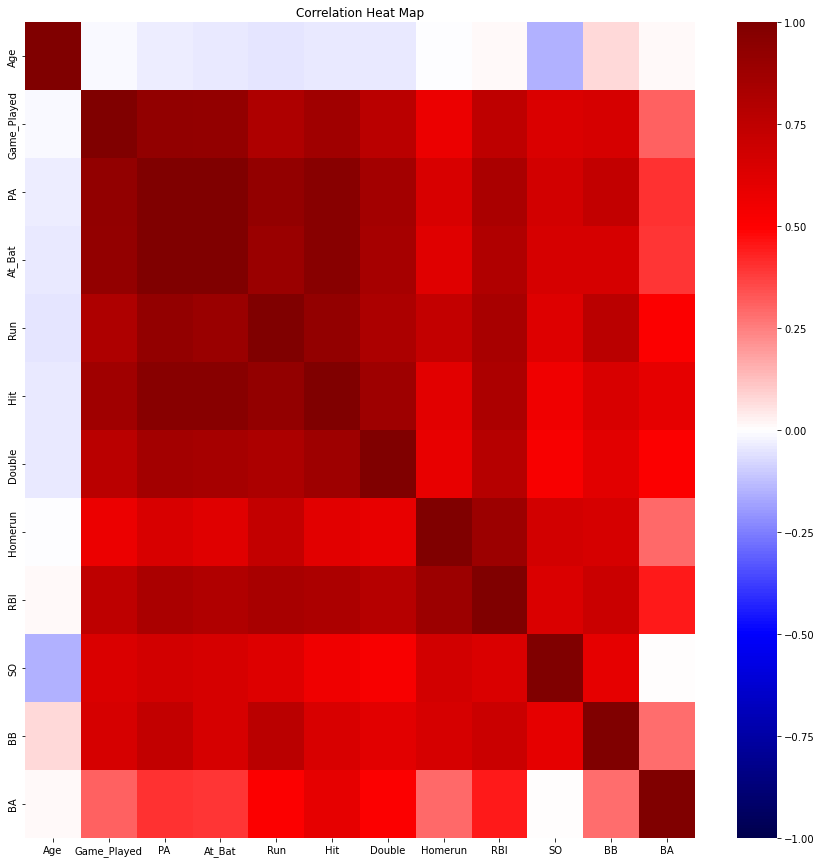

In [19]:
### Heatmap to find the correlation with targaet

fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(mlb_df.corr(), cmap = 'seismic', vmin = -1, ax = ax).set_title("Correlation Heat Map")

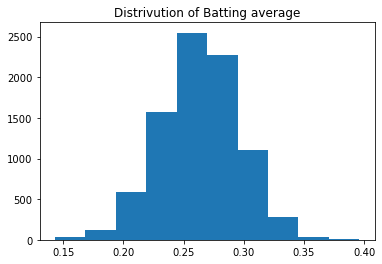

In [25]:
st.write(
'''
### Graphing and Buttons
Let's graph some of our data with matplotlib. We can also add buttons to add interactivity to our app.
'''
)

fig, ax = plt.subplots()

ax.hist(mlb_df['BA'])
ax.set_title('Distrivution of Batting average')

show_graph = st.checkbox('Show Graph', value=True)

if show_graph:
    st.pyplot(fig)

In [33]:
# PART 6 - Linear Regression Model

st.write(
'''
## Train a Linear Regression Model
Now let's create a model to predict batting averages from other statistics.
'''
) 

X = mlb_df.drop(columns = 'BA')
y = mlb_df['BA']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

st.write(f'Test RÂ²: {lr.score(X_test, y_test):.3f}')


In [34]:
# PART 7 - Predictions from User Input

st.write(
'''
## Model Predictions
And finally, we can make predictions with our trained model from user input.
'''
)

so_1 = st.number_input('Strikeouts', value=50)
bb_1 = st.number_input('Based on Balls', value=30)

input_data = pd.DataFrame({'SO' : [so_1], 'BB' : [bb_1]})
pred = lr.predict(input_data)[0]

st.write(
f'Predicted Sales Price of House: ${int(pred):,}'
)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 2)